<a href="https://colab.research.google.com/github/Mohitranga/deep-learning/blob/main/cifar_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 5s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

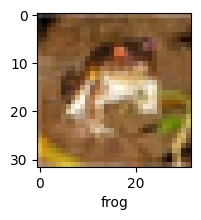

In [ ]:
plot_sample(x_train,y_train,0)

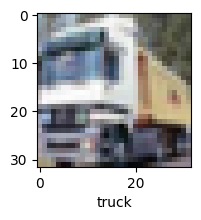

In [ ]:
plot_sample(x_train,y_train,1)

In [ ]:
x_train=x_train/255
x_test=x_test/255

**TRAINING USING ANN**


In [ ]:
model=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000,activation='relu'),
                         layers.Dense(1000,activation='relu'),
                         layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 305s 195ms/step - loss: 1.8884 - accuracy: 0.3266
Epoch 2/5
1563/1563 [==============================] - 323s 206ms/step - loss: 1.6579 - accuracy: 0.4025
Epoch 3/5
1563/1563 [==============================] - 330s 211ms/step - loss: 1.5809 - accuracy: 0.4335
Epoch 4/5
1563/1563 [==============================] - 348s 223ms/step - loss: 1.5273 - accuracy: 0.4519
Epoch 5/5
1563/1563 [==============================] - 330s 211ms/step - loss: 1.4929 - accuracy: 0.4638


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 12s 37ms/step - loss: 1.5137 - accuracy: 0.4587


[1.5137183666229248, 0.4587000012397766]

**CNN**

In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8774 - accuracy: 0.6944
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8394 - accuracy: 0.7053
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8107 - accuracy: 0.7183
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7800 - accuracy: 0.7271
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7508 - accuracy: 0.7362
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7240 - accuracy: 0.7456
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6984 - accuracy: 0.7537
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6739 - accuracy: 0.7630
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6502 - accuracy: 0.7700
Epoch 10/10
1563/1563 [==============================] - 44s 28m

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.0183 - accuracy: 0.6688


[1.0182673931121826, 0.6687999963760376]

In [ ]:
y_test=y_test.reshape(-1)

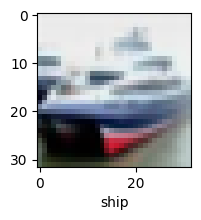

In [ ]:
plot_sample(x_test,y_test,1)

In [ ]:
y_predict=cnn.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [ ]:
y_predict[0]

array([3.7750897e-03, 2.0349959e-04, 1.6523609e-02, 8.9391923e-01,
       6.0514505e-03, 7.0422277e-02, 6.2502581e-03, 1.1699263e-03,
       1.4992510e-03, 1.8518620e-04], dtype=float32)

In [ ]:
y_class=[np.argmax(element) for element in y_predict]
y_class[:10]

[3, 8, 8, 0, 4, 6, 0, 2, 3, 1]

In [ ]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

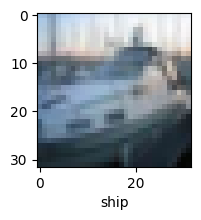

In [ ]:
plot_sample(x_test,y_test,2)

In [ ]:
classes[y_class[2]]

'ship'

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
tf.math.confusion_matrix(labels=y_test,predictions=y_class)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[686,  15,  59,  34,  40,  10,   9,  11,  92,  44],
       [ 32, 741,   3,  28,  15,   5,  14,   7,  35, 120],
       [ 61,   5, 495, 105, 150,  83,  54,  19,  16,  12],
       [ 20,   7,  52, 557,  87, 179,  42,  25,  16,  15],
       [ 12,   0,  48,  80, 718,  58,  31,  38,  10,   5],
       [ 11,   2,  45, 213,  71, 592,  14,  38,   8,   6],
       [  5,   8,  62,  95,  85,  34, 692,   8,   4,   7],
       [ 12,   2,  31,  70,  93,  83,   8, 673,   8,  20],
       [ 63,  35,  21,  32,  24,  10,   9,   6, 767,  33],
       [ 30,  71,  11,  33,  15,  13,   8,  21,  31, 767]], dtype=int32)>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
